# Introduction to NLP

NPL has the goal of deriving information out of natural language.

Another common term for NLP problems is sequence problems (seq2seq)

## Data

The data set we're going to use is Kaggle's introduction to NLP dataset.

Here's a link: https://www.kaggle.com/c/nlp-getting-started.


In [48]:
import pandas as pd

train_df= pd.read_csv("./data/09_introduction_to_nlp_and_RNNs/train.csv")
test_df = pd.read_csv("./data/09_introduction_to_nlp_and_RNNs/test.csv")

### Visualize a text dataset.

In [49]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [50]:
# Shuffle taraining dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)

In [51]:
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [52]:
# What does test dataframe looks like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Since I'm not going to submit anything on kaggle, test set is useless to me because it don't have labels.

In [53]:
# how many samples?
len(train_df_shuffled)

7613

In [54]:
# Let's visualize some random training samples.
import random
rand_idx = random = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][rand_idx:rand_idx+5].itertuples():
  _, text, target = row
  print(f"Target: {target}")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: 0
Text:
2015 new fashion ladies gold watch waterproof WeiQin famous brand michel quartz de lujo caÛ_ http://t.co/1JgsioUJaS http://t.co/719TZEyHFn

-----

Target: 0
Text:
With a sinking music video tv career Brooke Hogan should be THANKING her Dad for the free publicity...although I doubt it will help her.

-----

Target: 0
Text:
Afghan peace talks in doubt after Mullah Omar's death - Financial Times | #Mullah

-----

Target: 0
Text:
I Survived A 12-Step Program for Sex Addiction - http://t.co/xsX26oo16s

-----

Target: 0
Text:
@FAIRx818x @PlayOverwatch @BlizzardCS please blizzard we love you

-----



In [55]:
# make train and validation split
X = train_df_shuffled["text"].to_numpy()
y = train_df_shuffled["target"].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [56]:
len(X_train), len(X_val), len(y_val), len(y_train)

(6851, 762, 762, 6851)

In [57]:
# Check 10 first samples

X_train[:10], y_train

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers


### Tokenization

In [58]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [59]:
# Use default TextVectorisation parameters
text_vectorization = TextVectorization(max_tokens=None,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=None)

In [60]:
# Find the average number of tokens in train data
round(sum([len(i.split()) for i in X_train]) / len(X_train))

15

In [61]:
# Setup text vectorization variables
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                output_sequence_length=max_length)

In [62]:
text_vectorizer.adapt(X_train)

In [63]:
sample_sentence = "Theres a flood in my street"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=int64)>

In [64]:
import numpy as np
random_sentence = np.random.choice(X_train)
print(f"Orginal text: \n {random_sentence}\
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Orginal text: 
 Water now tops the charts for highest global risk in terms of devastationÛ_ ahead of nuclear war or a global pandemic http://t.co/nbcvbSO9nm        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 190,   48, 4400,    2, 3113,   10, 2958,  894, 1062,    4, 3345,
           6,    1, 1155,    6]], dtype=int64)>

In [65]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab)

10000

In [66]:
words_in_vocab[:5] # 5 most commont words

['', '[UNK]', 'the', 'a', 'in']

In [67]:
words_in_vocab[-5:] # 5 least common words

['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']

### Embedding

In [68]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                            output_dim=128,
                            input_length=max_length)
embedding

In [69]:
# et random sentence
random_sentence = np.random.choice(X_train)

# Embed the random sentence (turn it into numerical reprezentation)
sample_embed = embedding(text_vectorizer([random_sentence]))
print(f"Orginal text: \n {random_sentence}\
        \n\nVectorized version:")
sample_embed

Orginal text: 
 #FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock http://t.co/7enNulLKzM        

Vectorized version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.03821668, -0.0152208 , -0.0242126 , ..., -0.03094035,
          0.03005237,  0.01473108],
        [-0.00394255, -0.03181588, -0.03212656, ..., -0.01292272,
          0.01113068, -0.01994925],
        [ 0.03970409,  0.04789478, -0.02886786, ...,  0.02121494,
          0.00511824,  0.02313777],
        ...,
        [ 0.04073824,  0.0176979 , -0.02975166, ..., -0.03879651,
          0.01005026,  0.00621309],
        [ 0.04073824,  0.0176979 , -0.02975166, ..., -0.03879651,
          0.01005026,  0.00621309],
        [ 0.04073824,  0.0176979 , -0.02975166, ..., -0.03879651,
          0.01005026,  0.00621309]]], dtype=float32)>

### Model 0 : Baseline model

We'are going to use Sklearn's Multinomial Naive Bayes the TF-IDF formula.

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(X_train, y_train)

# Evaluate
baseline_score = model_0.score(X_val, y_val)
print(f"Baseline's accuracy: {baseline_score*100:.2f}%")

Baseline's accuracy: 79.27%


In [71]:
from utils_sklearn import evaluate_preds_classification
baseline_preds = model_0.predict(X_val)

In [72]:
baseline_metrics = evaluate_preds_classification(y_val, baseline_preds);

Accuracy: 79.27%
Precision: 0.8861788617886179
Recall: 0.6264367816091954
F1 Score: 0.734006734006734 



### Model 1: Feed forward neural network

In [73]:
# Instantiate embeddings and Text vector layers
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                output_sequence_length=max_length,
                                   name="TextVectorizer")

embedding = layers.Embedding(input_dim=max_vocab_length,
                            output_dim=128,
                            input_length=max_length,
                            name="Embedding")
text_vectorizer.adapt(X_train)

In [74]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Embedding, Input, GlobalMaxPool1D
import utils

tf.random.set_seed(42)
inputs = Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = GlobalMaxPool1D(name="GlbAvgPool1D")(x)
outputs = layers.Dense(1, activation="sigmoid", name="output_layer")(x)

model_1 = Model(inputs, outputs, name="model_1_Feed_forward_NN")


model_1.compile(loss="binary_crossentropy",
               optimizer="adam",
                metrics="accuracy"
               )

callbacks = [utils.create_tensorboard_callback("./logs/09_introduction_to_nlp_and_RNNs",
                                             "model_1")]
history_1 = model_1.fit(X_train, y_train, epochs=3,
                       validation_data=(X_val, y_val),
                       callbacks= callbacks)

Saving TensorBoard log files to: ./logs/09_introduction_to_nlp_and_RNNs/model_1/20210921-121910
Epoch 1/3
215/215 [==============================] - 4s 14ms/step - loss: 0.6385 - accuracy: 0.6580 - val_loss: 0.5738 - val_accuracy: 0.7651
Epoch 2/3
215/215 [==============================] - 2s 10ms/step - loss: 0.4667 - accuracy: 0.8297 - val_loss: 0.4715 - val_accuracy: 0.7822
Epoch 3/3
215/215 [==============================] - 2s 9ms/step - loss: 0.3381 - accuracy: 0.8775 - val_loss: 0.4543 - val_accuracy: 0.7913


In [75]:
# evaluate model
model1_preds = model_1.predict(X_val)
model1_metrics = evaluate_preds_classification(y_val, np.round(model1_preds))

Accuracy: 79.13%
Precision: 0.8436363636363636
Recall: 0.6666666666666666
F1 Score: 0.7447833065810594 



In [109]:
# visualize predictions

def visualuze_metrics(metrics_dicts, names_of_models, figsize=(6, 6)):
    import matplotlib.pyplot as plt
    %matplotlib inline
    df_metrics = pd.DataFrame.from_dict(metrics_dicts)
    df_metrics.index = names_of_models
    df_metrics.plot.bar(figsize=figsize)
    plt.xticks(c="white", rotation="horizontal")
    plt.yticks(c="white");
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

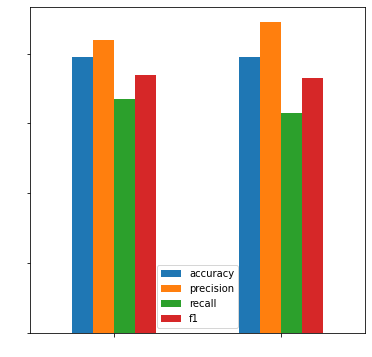

In [77]:
visualuze_metrics((model1_metrics, baseline_metrics),["Feed forward NN","Multinomial Naive Bayes"])

### Visualize embeddings

In [78]:
model_1.summary()

Model: "model_1_Feed_forward_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
TextVectorizer (TextVectoriz (None, 15)                0         
_________________________________________________________________
Embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
GlbAvgPool1D (GlobalMaxPooli (None, 128)               0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Get the weight matrix of embedding layer
vocab = text_vectorizer.get_vocabulary()
embed_weights = model_1.get_layer("Embedding").get_weights()[0]
embed_weights

array([[-0.05359416, -0.02641659, -0.0779337 , ..., -0.00769626,
        -0.05399211,  0.00088535],
       [-0.03805873, -0.03782602, -0.07444458, ..., -0.02027151,
        -0.0488812 , -0.00852444],
       [-0.028234  , -0.01640459, -0.03620162, ..., -0.04612003,
        -0.04742247, -0.02268683],
       ...,
       [-0.03301444, -0.0052493 , -0.04209725, ...,  0.02028764,
         0.00308807,  0.02215792],
       [ 0.02133723,  0.01553482, -0.00238698, ..., -0.01781169,
         0.02554074, -0.00167966],
       [ 0.00283879,  0.02564049, -0.01014895, ...,  0.04555799,
        -0.02234115, -0.04768636]], dtype=float32)

In [80]:
embed_weights[0].shape

(128,)

In [81]:
len(embed_weights[0])

128

In [82]:
embed_weights[0][0]

-0.05359416

I'm going to use http://projector.tensorflow.org to visualize embeddings.

In [83]:
# code for exporting vectors and metadata
import io
out_v = io.open('./embeddings/09_introduction_to_nlp_and_RNNs/baseline/vectors.tsv',
                'w', encoding='utf-8')
out_m = io.open('./embeddings/09_introduction_to_nlp_and_RNNs/baseline/metadata.tsv', 
                'w', encoding='utf-8')

for index, word in enumerate(vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

## Recurent Neural Networks

### Model 2: LSTM

In [84]:
# Create an LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = Model(inputs, outputs, name="model_2_LSTM")

In [85]:
model_2.compile(loss="binary_crossentropy",
               optimizer="adam",
                metrics="accuracy"
               )

callbacks = [utils.create_tensorboard_callback("./logs/09_introduction_to_nlp_and_RNNs",
                                             "model_2")]
history_2 = model_2.fit(X_train, y_train, epochs=5,
                       validation_data=(X_val, y_val),
                       callbacks= callbacks)

Saving TensorBoard log files to: ./logs/09_introduction_to_nlp_and_RNNs/model_2/20210921-121920
Epoch 1/5
215/215 [==============================] - 6s 16ms/step - loss: 0.4062 - accuracy: 0.8186 - val_loss: 0.4587 - val_accuracy: 0.7900
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2724 - accuracy: 0.8933 - val_loss: 0.5346 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1942 - accuracy: 0.9289 - val_loss: 0.5887 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1450 - accuracy: 0.9496 - val_loss: 0.6273 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1065 - accuracy: 0.9616 - val_loss: 0.8805 - val_accuracy: 0.7625


In [86]:
model2_preds = model_2.predict(X_val)
model2_metrics = evaluate_preds_classification(y_val, np.round(model2_preds))

Accuracy: 76.25%
Precision: 0.7634069400630915
Recall: 0.6954022988505747
F1 Score: 0.7278195488721805 



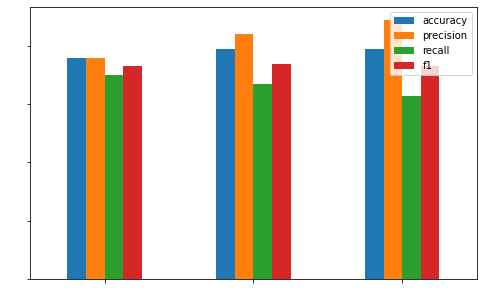

In [87]:
visualuze_metrics([model2_metrics, model1_metrics, baseline_metrics],
                  ["LSTM", "Feed forward NN","Multinomial Naive Bayes"],
                 figsize=(8,5))

### Model 3 : GRU

In [88]:
# create a GRU model
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, activation="tanh")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_3 = Model(inputs, outputs)

In [89]:
model_3.compile(loss="binary_crossentropy",
               optimizer="adam",
                metrics="accuracy"
               )

callbacks = [utils.create_tensorboard_callback("./logs/09_introduction_to_nlp_and_RNNs",
                                             "model_3")]
history_3 = model_3.fit(X_train, y_train, epochs=5,
                       validation_data=(X_val, y_val),
                       callbacks= callbacks)

Saving TensorBoard log files to: ./logs/09_introduction_to_nlp_and_RNNs/model_3/20210921-121937
Epoch 1/5
215/215 [==============================] - 5s 16ms/step - loss: 0.2007 - accuracy: 0.9174 - val_loss: 0.6005 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 2s 12ms/step - loss: 0.1035 - accuracy: 0.9634 - val_loss: 0.7639 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0824 - accuracy: 0.9696 - val_loss: 0.9664 - val_accuracy: 0.7559
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0727 - accuracy: 0.9729 - val_loss: 0.8990 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0565 - accuracy: 0.9762 - val_loss: 0.9815 - val_accuracy: 0.7677


In [90]:
model3_preds = model_3.predict(X_val)
model3_metrics = evaluate_preds_classification(y_val, np.round(model3_preds))

Accuracy: 76.77%
Precision: 0.768025078369906
Recall: 0.7040229885057471
F1 Score: 0.7346326836581709 



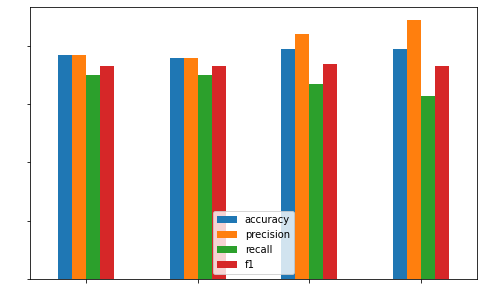

In [91]:
visualuze_metrics([model3_metrics,model2_metrics, model1_metrics, baseline_metrics],
                  ["GRU", "LSTM", "Feed forward NN","Multinomial Naive Bayes"],
                 figsize=(8,5))

### Model 4: Bidirectional RNN

In [92]:
# create bidirectional NN
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.GRU(64, activation="tanh", return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64, activation="tanh"))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_4 = Model(inputs, outputs)

In [93]:
model_4.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
                metrics="accuracy"
               )

callbacks = [utils.create_tensorboard_callback("./logs/09_introduction_to_nlp_and_RNNs",
                                             "model_4")]
history_4 = model_4.fit(X_train, y_train, epochs=5,
                       validation_data=(X_val, y_val),
                       callbacks= callbacks)

Saving TensorBoard log files to: ./logs/09_introduction_to_nlp_and_RNNs/model_4/20210921-121954
Epoch 1/5
215/215 [==============================] - 15s 35ms/step - loss: 0.0929 - accuracy: 0.9660 - val_loss: 1.1034 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0621 - accuracy: 0.9750 - val_loss: 1.2336 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0591 - accuracy: 0.9762 - val_loss: 1.3085 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0582 - accuracy: 0.9772 - val_loss: 1.2118 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0547 - accuracy: 0.9788 - val_loss: 1.1608 - val_accuracy: 0.7703


In [94]:
model4_preds = model_4.predict(X_val)
model4_metrics = evaluate_preds_classification(y_val, np.round(model4_preds))

Accuracy: 77.03%
Precision: 0.7711598746081505
Recall: 0.7068965517241379
F1 Score: 0.7376311844077962 



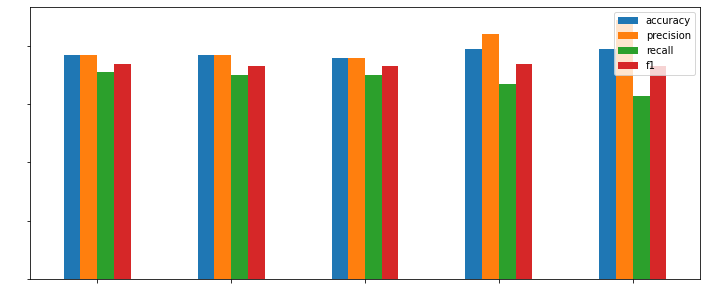

In [95]:
visualuze_metrics([model4_metrics,model3_metrics,model2_metrics, model1_metrics, baseline_metrics],
                  ["Bidirectional", "GRU", "LSTM", "Feed forward NN","Multinomial Naive Bayes"],
                 figsize=(12,5))

### Model 5: 1D Conv NN

In [96]:
# create model
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(16, 1, activation="relu", padding="same")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_5 = Model(inputs, outputs)

In [97]:
model_5.compile(loss="binary_crossentropy",
               optimizer="adam",
                metrics="accuracy"
               )

callbacks = [utils.create_tensorboard_callback("./logs/09_introduction_to_nlp_and_RNNs",
                                             "model_5")]
history_5 = model_5.fit(X_train, y_train, epochs=1,
                       validation_data=(X_val, y_val),
                       callbacks= callbacks)

Saving TensorBoard log files to: ./logs/09_introduction_to_nlp_and_RNNs/model_5/20210921-122031
215/215 [==============================] - 7s 14ms/step - loss: 0.2578 - accuracy: 0.9291 - val_loss: 0.6050 - val_accuracy: 0.7848


In [98]:
model5_preds = model_5.predict(X_val)
model5_metrics = evaluate_preds_classification(y_val, tf.squeeze(np.round(model5_preds)))

Accuracy: 78.48%
Precision: 0.8026315789473685
Recall: 0.7011494252873564
F1 Score: 0.7484662576687118 



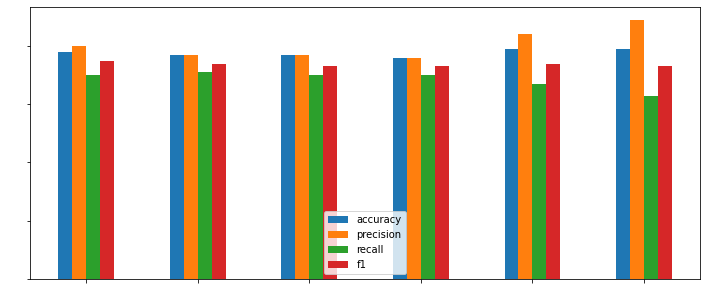

In [99]:
visualuze_metrics([model5_metrics, model4_metrics, model3_metrics,model2_metrics, model1_metrics, baseline_metrics],
                  ["Conv 1D","Bidirectional", "GRU", "LSTM", "Feed forward NN","Multinomial Naive Bayes"],
                  figsize=(12,5))

### Model 6: Pretrained USE from TFhub

In [100]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras import Model, Sequential, layers
from tensorflow.keras.layers import Dense, Embedding, Input, GlobalMaxPool1D, LSTM
import utils, utils_sklearn
import numpy as np

# models url
MODEL_URL =  "https://tfhub.dev/google/universal-sentence-encoder/4" # almost 1GB

In [101]:
embed = hub.KerasLayer(MODEL_URL,
                      input_shape=[], dtype=tf.string, trainable=False, name="USE")

In [102]:
# create a model
model_6 = Sequential([
    embed,
    layers.Reshape((1,512)),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
               optimizer="adam",
                metrics="accuracy"
               )

callbacks = [utils.create_tensorboard_callback("./logs/09_introduction_to_nlp_and_RNNs",
                                             "model_5")]
history_6 = model_6.fit(X_train, y_train, epochs=5,
                       validation_data=(X_val, y_val),
                       callbacks= callbacks)

Saving TensorBoard log files to: ./logs/09_introduction_to_nlp_and_RNNs/model_5/20210921-122053
Epoch 1/5
215/215 [==============================] - 17s 51ms/step - loss: 0.5060 - accuracy: 0.7630 - val_loss: 0.4374 - val_accuracy: 0.8071
Epoch 2/5
215/215 [==============================] - 6s 28ms/step - loss: 0.4072 - accuracy: 0.8168 - val_loss: 0.4259 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 6s 27ms/step - loss: 0.3954 - accuracy: 0.8250 - val_loss: 0.4245 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 6s 27ms/step - loss: 0.3906 - accuracy: 0.8285 - val_loss: 0.4199 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 6s 27ms/step - loss: 0.3863 - accuracy: 0.8305 - val_loss: 0.4248 - val_accuracy: 0.8136


In [103]:
model6_preds = model_6.predict(X_val)
model6_metrics = utils_sklearn.evaluate_preds_classification(y_val, np.round(model6_preds))

Accuracy: 81.36%
Precision: 0.8576388888888888
Recall: 0.7097701149425287
F1 Score: 0.7767295597484277 



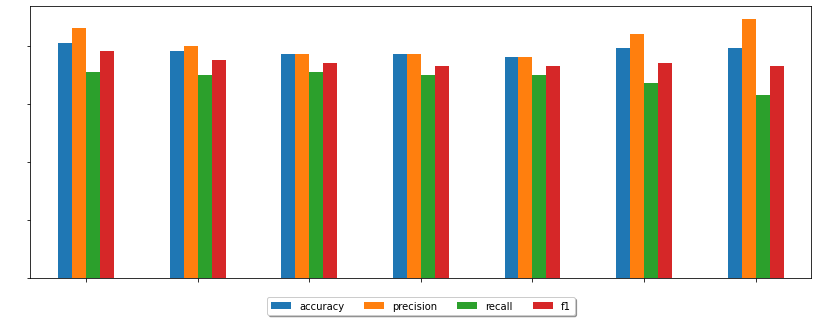

In [113]:
visualuze_metrics([model6_metrics, model5_metrics, model4_metrics, model3_metrics,model2_metrics, model1_metrics, baseline_metrics],
                  ["TFhub USE","Conv 1D","Bidirectional", "GRU", "LSTM", "Feed forward NN","Multinomial Naive Bayes"],
                  figsize=(14,5))